In [1]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv ')

1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
2)  Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
3) Какой клиент совершил больше всего успешных операций? (success == True)
4) С какой платформы осуществляется наибольшее количество успешных операций?
5) Какую платформу предпочитают премиальные клиенты?
6) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
7) Постройте график распределения числа успешных операций
8) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
 

In [3]:
user_data, logs

(      client  premium  age
 0      46346    False   58
 1       4391    False   55
 2      27372    False   64
 3      11989    False   44
 4      60664    False   49
 ...      ...      ...  ...
 2949   19411    False   29
 2950   61579    False   50
 2951   61221     True   64
 2952   29863    False   46
 2953   78499    False   36
 
 [2954 rows x 3 columns],
       client  success  platform        time
 0      40177     True     phone  1585412212
 1      61468     True     phone  1585425658
 2      35604    False     phone  1585459894
 3       9961     True     phone  1585400189
 4      10931     True  computer  1585468629
 ...      ...      ...       ...         ...
 4495   64496    False  computer  1585459072
 4496   73299     True     phone  1585458370
 4497    8967     True     phone  1585465121
 4498   52880    False     phone  1585455362
 4499   40921     True     phone  1585437692
 
 [4500 rows x 4 columns])

In [4]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
user_data.shape

(2954, 3)

In [6]:
logs\
    .isna()\
    .sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [7]:
logs\
    .groupby(['client'])\
    .agg({'success':'count'})\
    .sort_values('success', ascending= False)\
    .head()

,success
client,
61468,42
92584,41
61473,41
52870,41
12179,41


In [8]:
result = logs\
    .groupby(['client'])\
    .agg({'success':'count'})\
    .sort_values('success', ascending= False)\

    

In [9]:
max_success = result['success'].max()
max_client = result[result['success'] == max_success].index[0]

print("Максимальное значение success:", max_success)
print("Клиент с максимальным значением success:", max_client)

Максимальное значение success: 42
Клиент с максимальным значением success: 61468


In [10]:
best_platform = logs\
    .query('success == True')\
    .groupby('platform')\
    .agg({'success':"count"})\
    .sort_values('success', ascending= False)

In [11]:
big_dt_vip = user_data\
    .merge(logs)\
    .query('premium == True')\
    .groupby(['platform'])\
    .agg({'success':'count'})

In [12]:
big_dt_vip

,success
platform,
computer,150
phone,246
tablet,24


In [13]:
data = user_data\
    .merge(logs)
data


,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


C:\Users\Nikita PC\AppData\Local\Temp\ipykernel_8108\1526191465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query("premium == False").age)
C:\Users\Nikita PC\AppData\Local\Temp\ipykernel_8108\1526191465.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query("premium == True"

<Axes: xlabel='age', ylabel='Density'>

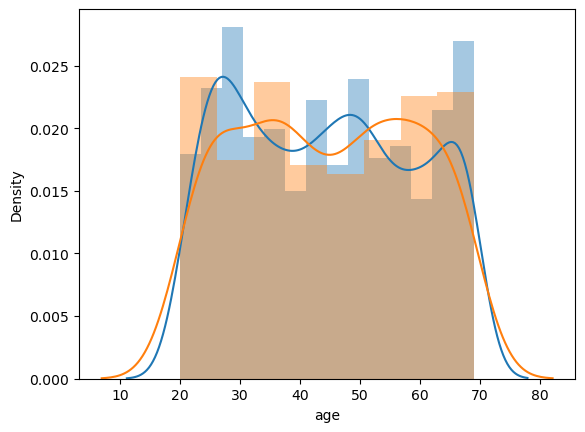

In [14]:
sns.distplot(data.query("premium == False").age)
sns.distplot(data.query("premium == True").age)

In [15]:
import matplotlib.pyplot as plt

C:\Users\Nikita PC\AppData\Local\Temp\ipykernel_8108\3669966681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query("premium == False").age, ax=ax[0], color ='green')
C:\Users\Nikita PC\AppData\Local\Temp\ipykernel_8108\3669966681.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da

<Axes: xlabel='age', ylabel='Density'>

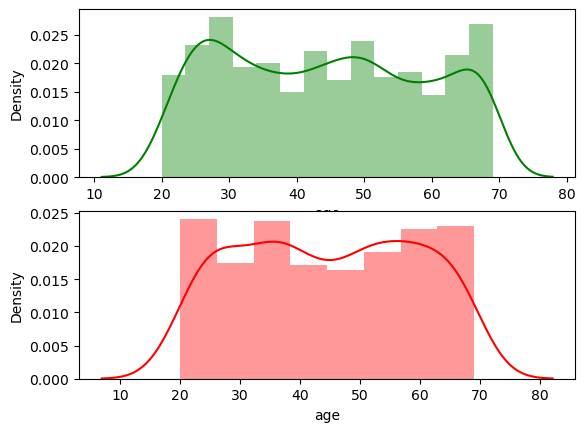

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=1)

sns.distplot(data.query("premium == False").age, ax=ax[0], color ='green')
sns.distplot(data.query("premium == True").age,ax=ax[1], color = 'red')

In [17]:
client_vs_success_number = data\
    .groupby('client')\
    .agg({'success':'sum'})

C:\Users\Nikita PC\AppData\Local\Temp\ipykernel_8108\1165199642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(client_vs_success_number, kde = False)


<Axes: >

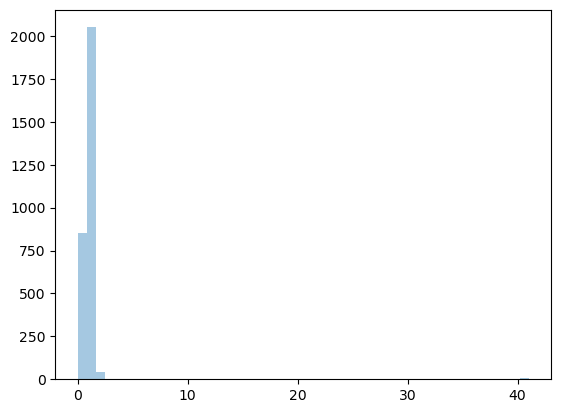

In [18]:
sns.distplot(client_vs_success_number, kde = False)

In [19]:
age_vs_success_number = data.query('platform == "computer"')\
    .groupby('age', as_index= False)\
    .agg({'success':'sum'})

<Axes: xlabel='age', ylabel='success'>

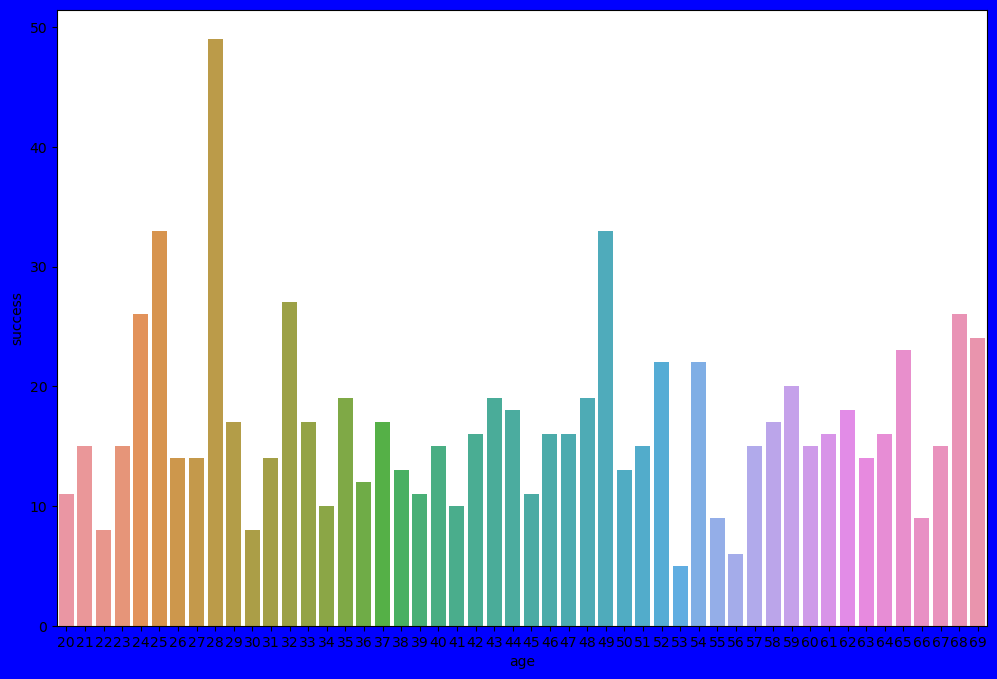

In [23]:
plt.figure(figsize=(12,8), facecolor='blue')
sns.barplot(x = 'age', y = "success", data = age_vs_success_number)